# Ajuste de Panorama

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

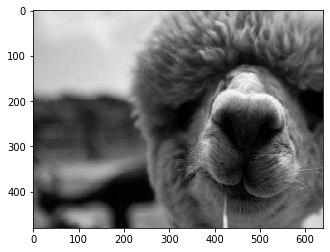

In [2]:
im1 = cv2.imread('images/pt1.jpg', 0)
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im1, 'gray')

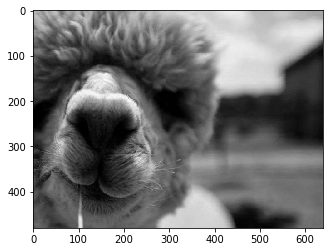

In [3]:
im2 = cv2.imread('images/pt2.jpg', 0)
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2, 'gray')

In [4]:
im1.shape, im2.shape

((480, 640), (480, 639))

In [5]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

In [6]:
print(mse(im1, im1))

0.0


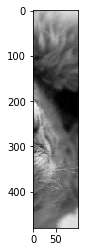

In [7]:
plt.imshow(im1[:, -100:], 'gray')

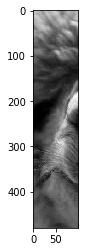

In [8]:
plt.imshow(im2[:, :100], 'gray')

In [9]:
for i in range(0, 400, 1):
    res = mse(im1[:, -100:], im2[:, i:(i+100)])
    
    if res == 0:
        print('i = '+str(i))
        break

i = 220


In [10]:
M_translacao = np.float32([[1,0,-i-100], [0,1,0]])
M_translacao

array([[   1.,    0., -320.],
       [   0.,    1.,    0.]], dtype=float32)

In [11]:
deslocamento = i+100

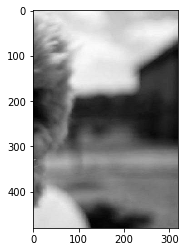

In [12]:
im_translated = cv2.warpAffine(im2, M_translacao, (640-(deslocamento),480))
plt.imshow(im_translated, 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff94408b1d0>,
 <matplotlib.image.AxesImage at 0x7ff944103450>)

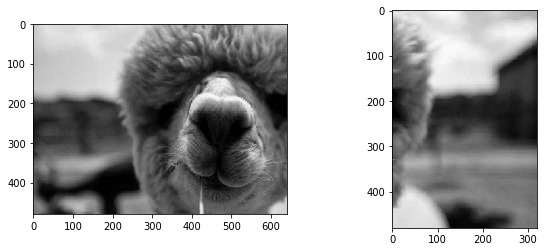

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(im1, 'gray')
plt.subplot(122), plt.imshow(im2[:, deslocamento:], 'gray')

(480, 960)


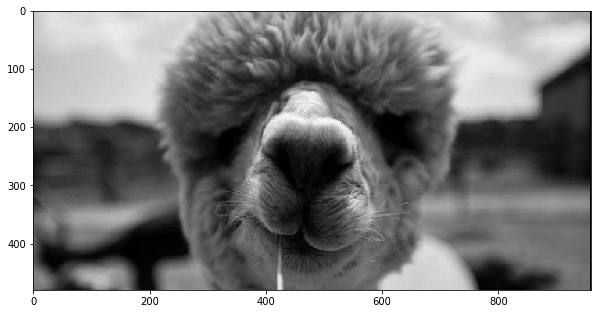

In [17]:
im_concat = np.concatenate((im1, im_translated), axis=1)
print(im_concat.shape)
plt.figure(figsize=(10,10))
plt.imshow(im_concat, 'gray')

In [18]:
a = cv2.imread('images/alpaca.jpg', 0)
a.shape

(480, 960)